# **II. Train & Forecast Data**




In [12]:
from google.colab import drive
drive.mount('/content/drive')
#Import thư viện
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

#Import dữ liệu
df = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/df1522.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        1230 non-null   object 
 1   Happiness Score                1230 non-null   float64
 2   Economy (GDP per Capita)       1230 non-null   float64
 3   Social support                 1230 non-null   float64
 4   Health (Life Expectancy)       1230 non-null   float64
 5   Freedom                        1230 non-null   float64
 6   Trust (Government Corruption)  1229 non-null   float64
 7   Generosity                     1230 non-null   float64
 8   Year                           1230 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 86.6+ KB


## 1. Phân tích dữ liệu và kiểm tra các giá trị

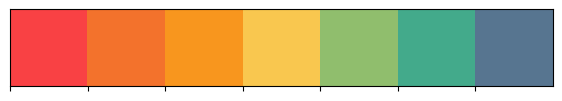

In [13]:
#Thay đổi màu sắc để dễ quan sát biểu đồ
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)


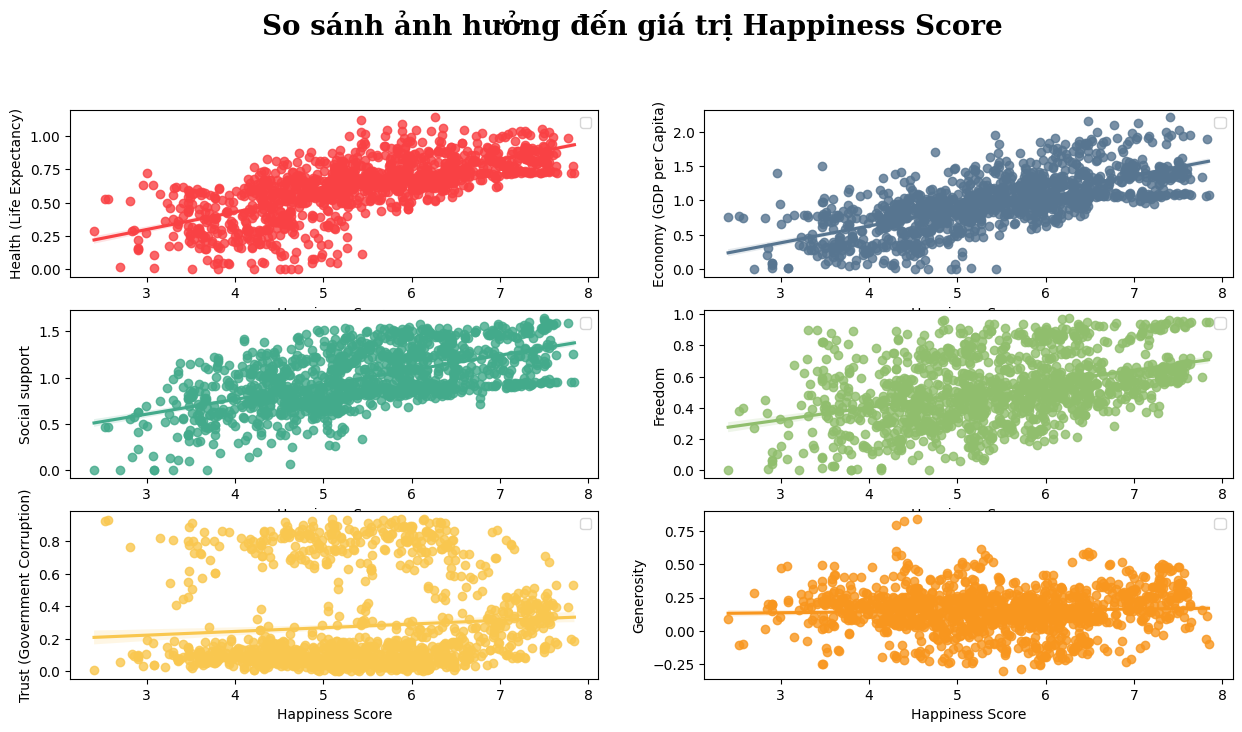

In [14]:
#Kiểm tra các giá trị ảnh hưởng quan trọng đến Happiness Score
dfCompare = df[[
    'Happiness Score',
    'Economy (GDP per Capita)',
    'Social support',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity']]
cols=dfCompare.corr()['Happiness Score'].sort_values(ascending=False)

fig=plt.figure(figsize=(15,10))
plt.suptitle("So sánh ảnh hưởng đến giá trị Happiness Score",family='Serif', weight='bold', size=20)
j=0
for i in cols.index[1:]:

    ax=plt.subplot(421+j)
    ax=sns.regplot(data=df, x='Happiness Score',y=i, color=color[-j])
    ax.legend('')
    j=j+1

plt.legend('')

Từ bảng so sánh trên, ta nhận thấy các giá trị Economy (GDP per Capita), Social support, Health (Life Expectancy), Freedom, Generosity có ảnh hưởng rất lớn đến điểm số Happiness Score.

## 2. Sử dụng phương pháp hồi quy Lasso để Train dữ liệu

In [15]:
#PHÂN TÍCH VÀ TRAIN DỮ LIỆU ĐỂ DỰ ĐOÁN HAPPINESS SCORE (SỬ DỤNG PHƯƠNG PHÁP HỒI QUY LASSO)
# Xác định các đặc trưng và biến mục tiêu
features = ['Economy (GDP per Capita)',
            'Social support',
            'Health (Life Expectancy)',
            'Freedom',
            'Generosity',]
target = 'Happiness Score'

# Tạo X và y từ dữ liệu
X = df[features]
y = df[target]

# Chia tập dữ liệu thành huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình hồi quy LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]  # Các giá trị alpha cần thử nghiệm
lasso_cv_model = LassoCV(alphas=alphas, cv=5)  # Sử dụng 5-fold cross-validation

# Huấn luyện mô hình trên tập huấn luyện
lasso_cv_model.fit(X_train, y_train)

# In giá trị alpha tối ưu
print(f"Alpha tối ưu: {lasso_cv_model.alpha_}")

# Lấy hệ số tối ưu
optimal_coeffs = lasso_cv_model.coef_

# In hệ số Lasso tối ưu
print("Hệ số Lasso tối ưu:")
for feature, coeff in zip(features, optimal_coeffs):
    print(f"{feature}: {coeff}")

Alpha tối ưu: 0.001
Hệ số Lasso tối ưu:
Economy (GDP per Capita): 0.9141866871635898
Social support: 1.0150876901110386
Health (Life Expectancy): 1.2447500214769232
Freedom: 1.6661628217464457
Generosity: 0.7976988928464914


## Sử dụng biểu đồ đường cong Lasso để phân tích hệ số Alpha tối ưu

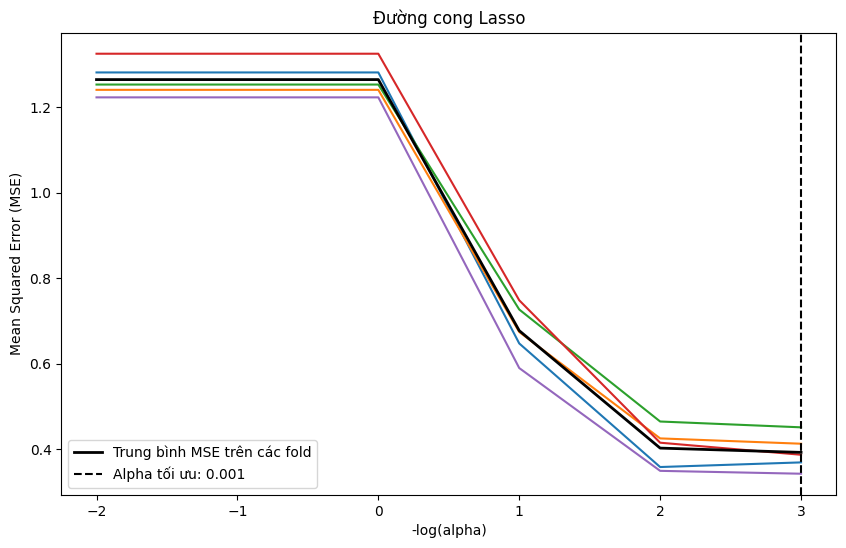

In [16]:
# Vẽ biểu đồ đường cong Lasso
plt.figure(figsize=(10, 6))
plt.plot(-np.log10(lasso_cv_model.alphas_), lasso_cv_model.mse_path_)
plt.plot(-np.log10(lasso_cv_model.alphas_), lasso_cv_model.mse_path_.mean(axis=-1), 'k',
         label='Trung bình MSE trên các fold', linewidth=2)
plt.axvline(-np.log10(lasso_cv_model.alpha_), linestyle='--', color='k',
            label='Alpha tối ưu: %s' % np.round(lasso_cv_model.alpha_, 4))
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Đường cong Lasso')
plt.axis('tight')
plt.show()

Từ biểu đồ đường con Lasso, ta thấy chỉ số Alpha tối ưu nhất là 0.001 tương ứng với MSE (Mean Squared Error) thấp nhất là 0.40

> Indented block



## Dự đoán trên Data đã train và phân tích hệ số sai số

In [17]:
# Dự đoán trên tập kiểm tra
y_pred = lasso_cv_model.predict(X_test)

# Tính toán Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error trên tập kiểm tra: {mse:.2f}")

Mean Squared Error trên tập kiểm tra: 0.40


Dao động độ chính xác của dự đoán(Mean Squared Error) là 0.4. Vì Happiness Score còn có sự phụ thuộc vào các yếu tố khác nên việc dự đoán hoàn toàn chính xác cần công thức tính toán cụ thể để xác định độ ảnh hưởng của từng giá trị.

## Vẽ biểu đồ so sánh giá trị dự đoán và giá trị thực tế

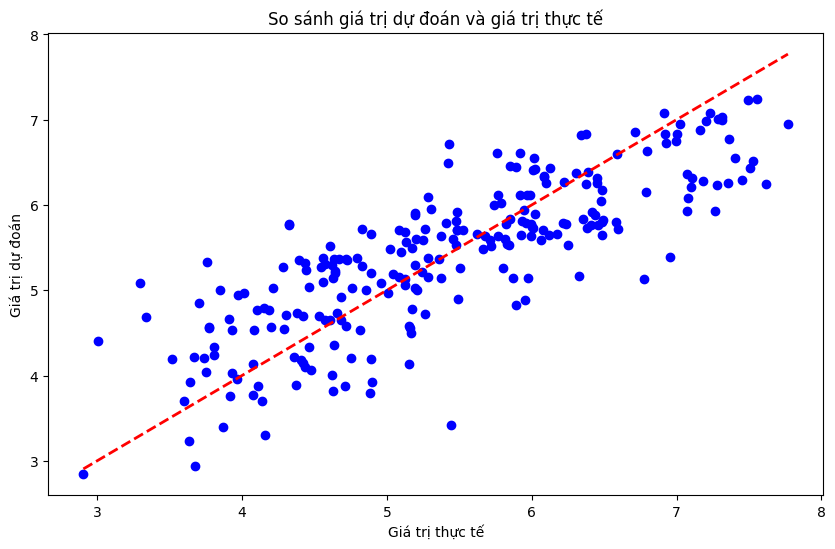

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('So sánh giá trị dự đoán và giá trị thực tế')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.show()

## Thêm dữ liệu Happiness Score Report 2023 để làm sạch và chuẩn hoá

In [36]:
#Thêm dữ liệu Happiness Score Report 2023, chuẩn hoá và làm sạch dữ liệu
df23 = pd.read_csv('/content/drive/MyDrive/BÀI TẬP LỚN DATAMINING/WHR2023.csv')
df23['Year'] = 2023
df23 = df23.rename(columns = {
    'Country name' : 'Country',
    'Ladder score' : 'Happiness Score',
    'Explained by: Log GDP per capita' : 'Economy (GDP per Capita)',
    'Explained by: Healthy life expectancy' : 'Health (Life Expectancy)',
    'Freedom to make life choices' : 'Freedom'})
#Xoá dữ liệu không hợp lệ
df23 = df.dropna(axis=0,thresh=3)
#Kiểm tra còn giá trị NaN nào không?
df23.isnull().sum()
df23

,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
1225,Botswana*,3.471,1.50300,0.81500,0.28000,0.57100,0.10200,0.01200,2022
1226,Rwanda*,3.268,0.78500,0.13300,0.46200,0.62100,0.54400,0.18700,2022
1227,Zimbabwe,2.995,0.94700,0.69000,0.27000,0.32900,0.10500,0.10600,2022
1228,Lebanon,2.955,1.39200,0.49800,0.63100,0.10300,0.03400,0.08200,2022


## Dự đoán Happiness Score của Vietnam vào 2023 khi nhập vào các số liệu.

In [20]:
# Nhập các giá trị của các đặc trưng theo mẫu để dự đoán
#[GDP_value, social_support_value, life_expectancy_value, freedom_value, generosity_value]
data_Vietnam2023 = np.array([[1.51, 0.836	, 0.468, 0.882, -0.041]])

# Dự đoán Happiness Score cho số năm trong tương lai
future_years = 2023
predicted_scores = lasso_cv_model.predict(data_Vietnam2023)

# Hiển thị kết quả dự đoán
print(f"Dự đoán Happiness Score của Việt Nam trong năm {future_years}: {predicted_scores[0]:.2f}")
Happiness_value = df23.loc[64, 'Happiness Score']
print(f"Happiness Score thực tế của Việt Nam trong năm {future_years}: {Happiness_value}")

Dự đoán Happiness Score của Việt Nam trong năm 2023: 6.02
Happiness Score thực tế của Việt Nam trong năm 2023: 5.763


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


In [43]:
def predict_happiness_scores(model, features, df23):
    X23 = df23[features]
    predicted_scores = model.predict(X23)
    return predicted_scores

# Gọi hàm để dự đoán Happiness Score
predicted_scores = predict_happiness_scores(lasso_cv_model, features, df23)

# Tính MSE giữa giá trị dự đoán và Happiness Score thực tế
mse = mean_squared_error(df23['Happiness Score'], predicted_scores)

print("Dự đoán Happiness Score và giá trị thực tế:")
for i, (predicted_score, real_score, country) in enumerate(zip(predicted_scores, df23['Happiness Score'], df23['Country'])):
    print(f"Quốc gia: {country}")
    print(f"Happiness Score dự đoán: {predicted_score:.2f}")
    print(f"Happiness Score thực tế: {real_score:.2f}")
    print(f"Sai số: {real_score - predicted_score:.2f}")
    print("-----------")

print(f"MSE: {mse:.2f}")

Streaming output truncated to the last 5000 lines.
Happiness Score dự đoán: 5.21
Happiness Score thực tế: 5.51
Sai số: 0.30
-----------
Quốc gia: Croatia
Happiness Score dự đoán: 4.90
Happiness Score thực tế: 5.49
Sai số: 0.59
-----------
Quốc gia: Hong Kong
Happiness Score dự đoán: 6.35
Happiness Score thực tế: 5.46
Sai số: -0.89
-----------
Quốc gia: Somalia
Happiness Score dự đoán: 3.42
Happiness Score thực tế: 5.44
Sai số: 2.02
-----------
Quốc gia: Kosovo
Happiness Score dự đoán: 4.40
Happiness Score thực tế: 5.40
Sai số: 1.00
-----------
Quốc gia: Turkey
Happiness Score dự đoán: 4.97
Happiness Score thực tế: 5.39
Sai số: 0.42
-----------
Quốc gia: Indonesia
Happiness Score dự đoán: 5.25
Happiness Score thực tế: 5.31
Sai số: 0.06
-----------
Quốc gia: Jordan
Happiness Score dự đoán: 5.03
Happiness Score thực tế: 5.30
Sai số: 0.27
-----------
Quốc gia: Azerbaijan
Happiness Score dự đoán: 4.89
Happiness Score thực tế: 5.29
Sai số: 0.41
-----------
Quốc gia: Philippines
Happiness Sco